In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy.stats import lognorm, norm, gaussian_kde

# Тест про ЦПТ

In [2]:
1197.69 + 3 * np.sqrt(116182.2)

2220.2553035381166

In [3]:
sigma = np.sqrt(116182.2 / (2015 - 1885 + 1))
sigma

29.780648463402596

In [4]:
1197.69 + 3 * sigma

1287.0319453902077

# ЦПТ своими руками

## Исходное распределение

Зафиксируем исходное распределение - логнормальное $\mathcal{N}(\mu=0, \sigma^2=1)$

Рассчитаем его матожидание и дисперсию.

In [5]:
dist = lognorm(1.0, 0.0)
dist_mean = dist.mean()
dist_std = dist.std()
print("E(x) = %.2f" % dist_mean)
print("std(x) = %.2f" % dist_std)

E(x) = 1.65
std(x) = 2.16


Сгенерируем выборку и посмотрим гистограмму плотности вероятности для выборки.

Визуально сравним с графиком аналитической функции плотности вероятности.

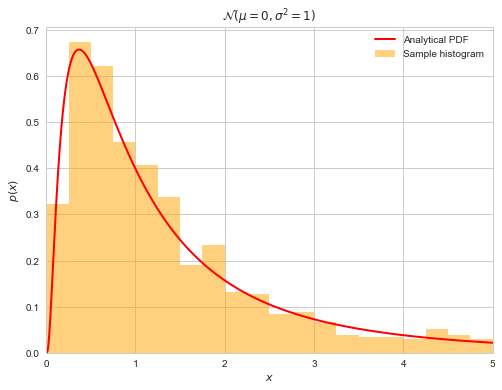

In [6]:
plt.figure(figsize=[8, 6])
BINS_SPACE = np.linspace(0.0, 5.0, 21)
XS_SPACE = np.linspace(0.0, 5.0, 1001)

sample = dist.rvs(1000, random_state=42)
plt.hist(sample, bins=BINS_SPACE, normed=True, alpha=0.5, label="Sample histogram", color="orange")

ys = dist.pdf(XS_SPACE)
plt.plot(XS_SPACE, ys, label="Analytical PDF", linewidth=2, color="red")

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.xlim([0.0, 5.0])
plt.title(r"$\mathcal{N}(\mu=0, \sigma^2=1)$");

Видно, что гистограмма значений из выборки весьма точно описывается аналитической функцией плотности вероятности.

## Анализ средних выбороки 

Расчет плотности вероятности для выборочных средних из выборок размера $n$:

In [7]:
def samples_means_pdf(sample_size):
    se = dist_std/np.sqrt(sample_size)
    ys = norm.pdf(XS_SPACE, loc=dist_mean, scale=se)
    return ys

Генерация $m$ выборок размера $n$ и расчет их средних:

In [8]:
def samples_means(n_samples, sample_size):
    samples = []
    for i in range(n_samples):
        samples.append(dist.rvs(sample_size, random_state=i))
    samples = np.array(samples)
    means = samples.mean(axis=1)
    return means

Построение графика плотности вероятности выборочных средних и вывод выборочных средних, полученных в эксперименте:

In [9]:
def sample_mean_distribution(n_samples, sample_size):
    means = samples_means(n_samples, sample_size)
    
    normal_ys = samples_means_pdf(sample_size)
    kde_ys = gaussian_kde(means).pdf(XS_SPACE)

    plt.hist(means, bins=BINS_SPACE, normed=True, alpha=0.5, color="orange", label="Sample's means histogram")
    plt.plot(XS_SPACE, kde_ys, label="Sample's means KDE", color="red")
    plt.plot(XS_SPACE, normal_ys, label = "Sample's means PDF", color="blue")
    
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    plt.xlim([0.0, 5.0])
    plt.title("%d-sized sample's means distribution for $\mathcal{N}(0, 1)$" % sample_size)

Эксперименты с выборочными средними:

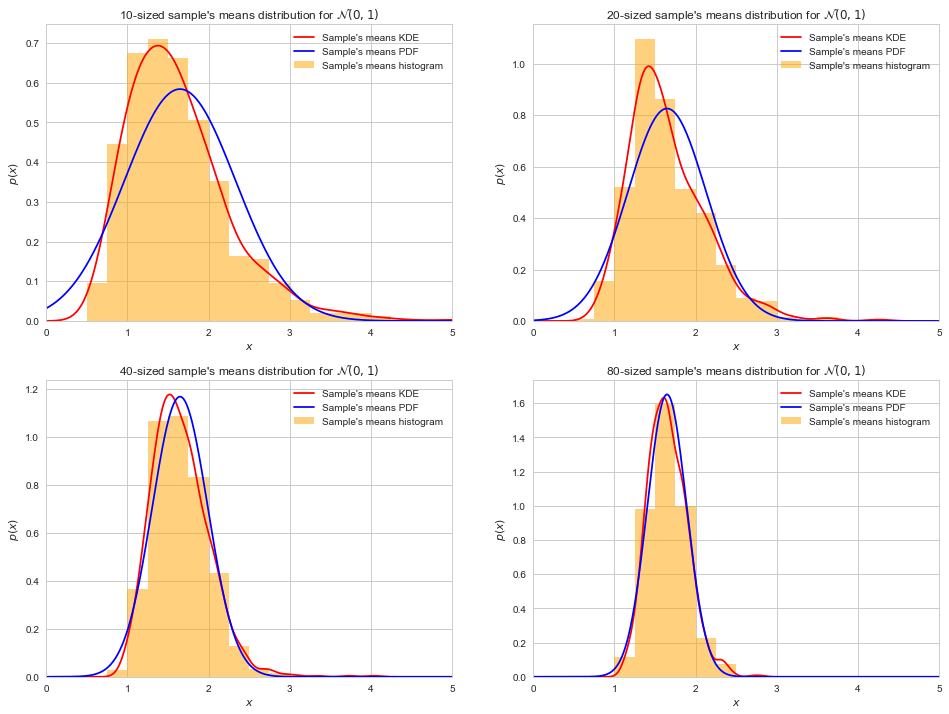

In [10]:
plt.figure(figsize=[16,12])
plt.subplot(2, 2, 1)
sample_mean_distribution(1000, 10)
plt.subplot(2, 2, 2)
sample_mean_distribution(1000, 20)
plt.subplot(2, 2, 3)
sample_mean_distribution(1000, 40)
plt.subplot(2, 2, 4)
sample_mean_distribution(1000, 80)

## Выводы

Из графиков можно сделать вывод, что при росте N распределение выборочных средних, порожденных лог-нормальным распределением, приближается к нормальному. В эксперименте видно, что при $N \leq 20$ распределение выборочных средних сильно скошено влево, но при $N \geq 40$ распределение уже весьма близко к нормальному.

Из этого мы можем заключить, что ЦПТ экспериментом подтверждается.